**BSOSE analysis of NO3 and dissolved Fe**

In [1]:
import scipy.io as sio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr
import xesmf as xe

In [3]:
# Load nitrate data
ds_no3 = xr.open_dataset('/Users/laaq/Documents/Python_code/Data/BSOSE/bsose_i128_2013to2018_100mAvg_monthly_NO3.nc')
ds_no3 = ds_no3.where(ds_no3['TRAC04'] != 0.)

# Load iron data
ds_fe = xr.open_dataset('/Users/laaq/Documents/Python_code/Data/BSOSE/bsose_i128_2013to2018_100mAvg_monthly_fe.nc')
ds_fe = ds_fe.where(ds_fe['TRAC06'] != 0.)

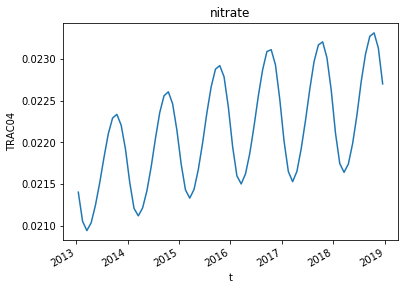

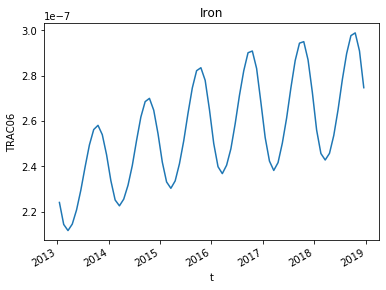

In [7]:
# Plot NO3 and Fe vs time
ds_no3.TRAC04.mean(dim=['x','y']).plot()
plt.title('nitrate')
plt.show()
ds_fe.TRAC06.mean(dim=['x','y']).plot()
plt.title('Iron')
plt.show()

**Compute climatologies**

In [8]:
# Compute Climatology
def compute_climatology(ds,nutrient):
    variable_climatology = np.zeros((588,2160,12))
    variable_climatology[:] = np.nan
    for n in range(12):
        a = ds.sel(t=ds['t.month']==n+1)
        b = a.mean(dim='t')
        if nutrient == 'no3':
            variable_climatology[:,:,n] = np.asarray(b.TRAC04)
        else:
            variable_climatology[:,:,n] = np.asarray(b.TRAC06)
    return variable_climatology
nitrate_climatology = compute_climatology(ds_no3,'no3')
iron_climatology = compute_climatology(ds_fe,'fe')

/Users/laaq/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/laaq/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/laaq/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/laaq/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/laaq/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/laaq/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/laaq/anaconda3/lib/python3.7/site

**Compute anomalies**

In [9]:
# Compute Anomalies
def compute_anomalies(ds,variable_climatology,nutrient):
    variable_anom = np.zeros((588,2160,72))
    variable_anom[:] = np.nan
    for n in range(72):
        mes_idx = ds['t.month'][n]-1
        if nutrient == 'no3':
            pre_anom = ds.TRAC04[n,:,:] - variable_climatology[:,:,mes_idx]
        else:
            pre_anom = ds.TRAC06[n,:,:] - variable_climatology[:,:,mes_idx]
        variable_anom[:,:,n] = np.asarray(pre_anom)
    return variable_anom
no3_anom = compute_anomalies(ds_no3,nitrate_climatology,'no3')
fe_anom = compute_anomalies(ds_fe,iron_climatology,'fe')

**Store data in xDataSet**

In [10]:
# Store data in xarray
bsose_anoms = xr.Dataset(data_vars={'no3_anom': (('lat','lon','time'), no3_anom)\
                             ,'fe_anom': (('lat','lon','time'), fe_anom)},\
                            coords={'lat':np.asarray(ds_no3['y'])\
                                    ,'lon':np.asarray(ds_no3['x'])\
                                    ,'time':np.asarray(ds_no3['t'])}) 

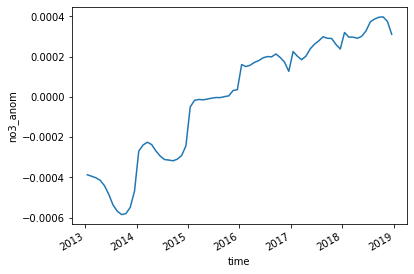

In [12]:
bsose_anoms.no3_anom.mean(dim=['lat','lon']).plot()